In [3]:
import os
import glob
import re
import pandas as pd 
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
sns.set_theme()
from importlib import reload  


from IPython.display import clear_output


from config import *
from probe_data import probe_locations

# Data Structures in the folder

Data structures in the folder

In [2]:
root_dir = r'F:\LES_Manchester\UoM_TJ_LES-20211013T183109Z-001\UoM_TJ_LES\lines'
sub_dirs = glob.glob1(root_dir, 'line*')
sub_dirs

['line1_y', 'line2_y', 'line3_y', 'line4_y', 'line5_y', 'line6_y']

for every subdir, there is one folder `22.56`, which contains three files

In [3]:
sub_dir = sub_dirs[0]
folder = os.path.join(root_dir, sub_dir, '22.56')
files = glob.glob1(folder, "*")
files

['line_T_k_nuSgs_TMean_kMean_nuSgsMean_TPrime2Mean_kPrime2Mean_nuSgsPrime2Mean.xy',
 'line_UPrime2Mean.xy',
 'line_U_UMean.xy']

The corresponding location of the lines is in the `description` file

In [4]:
# mapping the sub_dir name to the location, unit: Db
loc_map = {
    'line1_y': -7, 
    'line2_y': 1,
    'line3_y': 2,
    'line4_y':-0.5,
    'line5_y':-2,
    'line6_y':-4.5
}

# reverse the key mapping
loc_map_rev = {value:key for key, value in loc_map.items()}

In [5]:
column_names1= ['Y',
 'T',
 'k',
 'nuSgs',
 'TMean',
 'kMean',
 'nuSgsMean',
 'TPrime2Mean',
 'kPrime2Mean',
 'nuSgsPrime2Mean']

In [6]:
column_names2 = ['Y', 'uu', 'vv', 'ww', 'uv', 'uw', 'vw']

# Data Parser

In [17]:
def _line_data_parser(file_path):
    with open(file_path, 'r') as f:
        lines = f.readlines()
    content = []
    for line in lines:
        for special_char in ['\n', '\t']:
            line = line.replace(special_char, '')
        line = line.split(" ")
        if " " in line:
            line.remove(" ")
        elif "" in line:
                line.remove('')
        content.append(line)
    return content

def _convert_array_to_df(column_names, data):
    return pd.DataFrame(data=data,columns=column_names)

def get_df(file_path, column_names):
    data = _line_data_parser(file_path)
    data = np.array(data, dtype=float)
    data_shape = data.shape
    assert data_shape[1] == len(column_names), " The lenth of column names doesn't match the data shape "
    return _convert_array_to_df(column_names, data)
    

In [18]:
# Specify the data path
sub_dir = sub_dirs[0]
file = files[0]
file_path = os.path.join(root_dir, sub_dir, '22.56', file)

# Get the dataframe with the known column names
df = get_df(file_path, column_names1)
df

,Y,T,k,nuSgs,TMean,kMean,nuSgsMean,TPrime2Mean,kPrime2Mean,nuSgsPrime2Mean
0,-0.053150,288.15,0.000080,2.367876e-08,288.15,0.000123,2.220930e-08,-1.062290e-09,3.920652e-08,7.789276e-15
1,-0.052299,288.15,0.000070,1.056353e-07,288.15,0.000068,3.630781e-08,-9.749783e-10,1.631168e-08,1.070852e-14
2,-0.051449,288.15,0.000101,-3.290869e-08,288.15,0.000055,4.597169e-08,-1.004082e-09,6.971613e-09,1.283499e-14
3,-0.050598,288.15,0.000122,8.421300e-09,288.15,0.000056,5.890391e-08,-8.876668e-10,4.590755e-09,1.610655e-14
4,-0.049748,288.15,0.000030,1.369548e-07,288.15,0.000054,6.766546e-08,-8.876668e-10,3.420817e-09,1.970217e-14
...,...,...,...,...,...,...,...,...,...,...
121,0.049748,288.15,0.001845,-2.609283e-07,288.15,0.000851,3.675195e-07,-1.105946e-09,6.939437e-07,3.345667e-13
122,0.050598,288.15,0.000037,7.950006e-10,288.15,0.000790,3.104994e-07,-9.895302e-10,5.190058e-07,2.726784e-13
123,0.051449,288.15,0.000527,4.470451e-07,288.15,0.000710,2.422762e-07,-8.294592e-10,4.308847e-07,1.901321e-13
124,0.052299,288.15,0.000264,-6.775596e-08,288.15,0.000534,1.726932e-07,-8.585630e-10,2.402250e-07,9.660954e-14


# TKE

## Probe data

In [19]:
from csvtables import TableProbes
from probe_data import probe_locations

In [20]:
working_dir = r'F:\CFD_Manchester\1_FullModel\Struct\1p5mm_v2_ManchesterInlet\Probes'
table_name = 'probes_table'
pb_stc = TableProbes(working_dir, table_name, probe_locs=probe_locations, file_start_from=3000)


In [21]:
probe = (str(0.021*1), '0.05364', '0.00525')
pb_stc.read_file("TKE_Total", probe)

array([0.04215325, 0.04317788, 0.04517841, ..., 0.03549608, 0.03662167,
       0.03855805])

In [22]:
from manchester import ManchesterProbes

In [23]:
root = r'F:\LES_Manchester\UoM_TJ_LES-20211013T183109Z-001\UoM_TJ_LES'
working_dir = os.path.join(root, 'probes')
pb_les = ManchesterProbes(working_dir, probe_locs=probe_locations)
pb_les.get_probe_data(probe, data_type='kMean' )

(array([10.000097, 10.000391, 10.000684, ..., 22.566442, 22.566713,
        22.566985]),
 array([[0.00040328],
        [0.00047851],
        [0.000579  ],
        ...,
        [0.0001302 ],
        [0.0001302 ],
        [0.00013019]]))

## Line data 

In [58]:
files[1]

NameError: name 'files' is not defined

In [24]:
loc = 1

In [25]:
# find the folder name of the les data 
folder = loc_map_rev[loc]
file_path = os.path.join(root_dir, folder, '22.56', files[1])
df = get_df(file_path, column_names2)
tke_les = df["uu"] + df["vv"] + df["ww"]
z_les = df['Y']


In [26]:
from csvtables import TableLines

In [27]:
working_dir = r'F:\CFD_Manchester\1_FullModel\Struct\1p5mm_v2_ManchesterInlet\Lines'
table_name = 'Lines_table'
l = TableLines(working_dir, table_name, file_start_from=3000)

In [28]:
# Get time-avg data
tke_stc, std_stc = l.get_lineprobe(column='TKE_Total', x_loc=loc, direction="V")
# Get location
z_stc, _ =  l.get_lineprobe(column='Z (m)', x_loc=loc, direction="V")

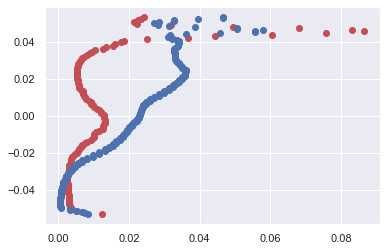

In [29]:
plt.plot(tke_les, z_les, 'ro')
plt.plot(tke_stc, z_stc, 'bo')

## Plot 

In [109]:

import plots 
import manchester
reload(plots)
reload(manchester)

<module 'manchester' from 'D:\\Dropbox (MIT)\\ResearchProjects\\2020_CFD\\DataProcessing\\cfd_1_ManchesterLESVal\\code\\manchester.py'>

In [110]:
import logging

In [111]:
logging.basicConfig(format='%(levelname)s:%(message)s', level=logging.DEBUG)
logging.getLogger("manchester").setLevel(logging.DEBUG)


In [112]:
from plots import plot_vertical_summary

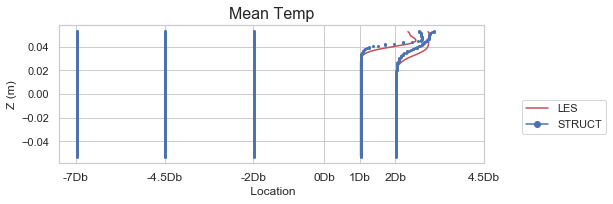

In [114]:
plot_vertical_summary('T', title='Mean Temp')

# Post-process TKE from Reynolds stress

In [81]:
from csvtables import TableLines

In [59]:
import manchester
reload(manchester)

<module 'manchester' from 'D:\\Dropbox (MIT)\\ResearchProjects\\2020_CFD\\DataProcessing\\cfd_1_ManchesterLESVal\\code\\manchester.py'>

In [60]:
data = manchester.get_line_table(x_loc=1, direction='V', data_type='TKE')
data

,Z,uu,vv,ww,uv,uw,vw
0,-0.052299,0.008377,-0.001393,-0.000048,0.001816,-0.000024,0.003664
1,-0.051449,0.005840,-0.000879,0.000004,0.001983,0.000044,0.002811
2,-0.050598,0.004535,-0.000445,-0.000035,0.002058,-0.000023,0.002281
3,-0.049748,0.003569,-0.000060,0.000020,0.002253,-0.000104,0.001920
4,-0.048898,0.003110,0.000116,0.000027,0.002477,-0.000092,0.001706
...,...,...,...,...,...,...,...
120,0.049748,0.018887,0.004287,-0.000792,0.020220,0.000056,0.023810
121,0.050598,0.019808,0.001761,-0.000079,0.017272,0.000463,0.025872
122,0.051449,0.021880,0.000413,0.000330,0.011953,0.000910,0.028549
123,0.052299,0.022396,0.001083,0.000026,0.009213,0.000386,0.031970


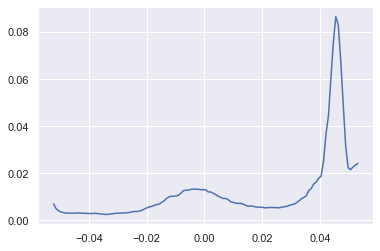

In [61]:
Z, data = manchester.get_line_data(x_loc=1, direction='V', data_type='TKE')
plt.plot(Z, data)